In [1]:
# Day 2 – Data Handling & Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("AAPL.csv")

# Clean price columns
price_cols = ["Close/Last", "Open", "High", "Low"]
for col in price_cols:
    df[col] = df[col].str.replace("$", "", regex=False).astype(float)

# Convert Date column
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Check NaNs
df.isna().sum()


,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [2]:
# Drop missing values
df = df.dropna()
df.isna().sum()


,0
Close/Last,0
Volume,0
Open,0
High,0
Low,0


In [3]:
# Daily returns
returns = df["Close/Last"].pct_change()
returns.head()


,Close/Last
Date,
2025-12-10,NaN
2025-12-09,-0.005739
2025-12-08,0.002562
2025-12-05,0.003203
2025-12-04,0.006887


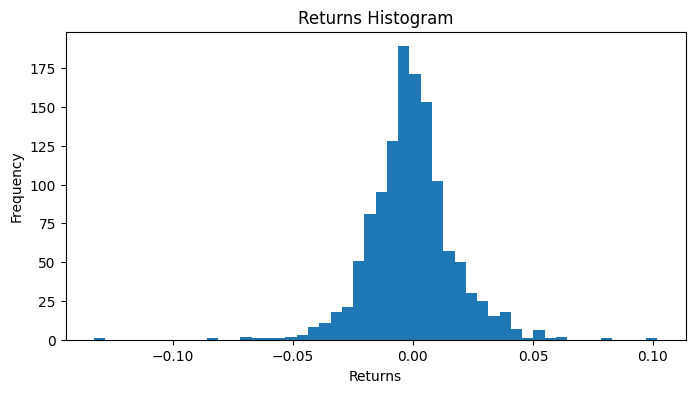

In [4]:
# Histogram of returns
plt.figure(figsize=(8,4))
plt.hist(returns.dropna(), bins=50)
plt.title("Returns Histogram")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Rolling 20-day standard deviation (volatility)
rolling_std = returns.rolling(window=20).std()

plt.figure(figsize=(10,4))
plt.plot(rolling_std)
plt.title("20-Day Rolling Volatility (Volatility Clustering)")
plt.xlabel("Date")
plt.ylabel("Rolling Std Dev")
plt.show()
